# Histograms

In [38]:
from matplotlib import pyplot as plt
import pandas as pd
import random

# Birthweight Data from https://raw.githubusercontent.com/joanby/tensorflow/master/datasets/birthweight.csv
bw_data = pd.read_csv('../../data/birthweight.csv')
bw_data

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,BWT
0,1.0,28.0,113.0,1.0,1.0,1.0,0.0,1.0,709.0
1,1.0,29.0,130.0,0.0,0.0,0.0,0.0,1.0,1021.0
2,1.0,34.0,187.0,1.0,1.0,0.0,1.0,0.0,1135.0
3,1.0,25.0,105.0,1.0,0.0,1.0,1.0,0.0,1330.0
4,1.0,25.0,85.0,1.0,0.0,0.0,0.0,1.0,1474.0
...,...,...,...,...,...,...,...,...,...
184,0.0,31.0,120.0,0.0,0.0,0.0,0.0,0.0,4167.0
185,0.0,35.0,170.0,0.0,0.0,1.0,0.0,0.0,4174.0
186,0.0,19.0,120.0,0.0,1.0,0.0,1.0,0.0,4238.0
187,0.0,24.0,216.0,0.0,0.0,0.0,0.0,0.0,4593.0


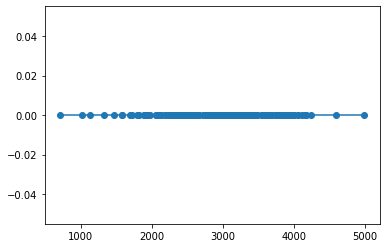

In [39]:
# Giả sử ta vẽ biểu đồ biểu thị cân nặng của dữ liệu trên
# Do hiện tại chỉ có 1 đại lượng nên ta vẽ nó lên 1 trục X duy nhất
# Và kết quả là bên dưới, ta thấy các chấm nhỏ đại diện cho 1 cân nặng
# Do có hàng trăm chấm nhỏ nên chúng rất nhỏ để nhìn và rút ra được insight gì

weights = bw_data['BWT']

plt.plot(weights, [0 for _ in range(len(bw_data))], "-o")
plt.show()

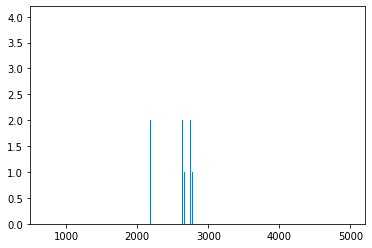

In [40]:
# Vì thế, ta sẽ dùng thêm 1 đại lượng nữa (thêm 1 trục tung Y) để biểu thị độ lặp lại (Tần số) của các cân nặng
# Sau khi vẽ xong, chúng ta lại thấy rằng các cột quá nhỏ để có thể nhìn vào

from collections import Counter

counter = Counter(bw_data['BWT']) # Use counter to make a freq table, {X : Freq(X)}
plt.bar(*zip(*counter.items()))
plt.show()

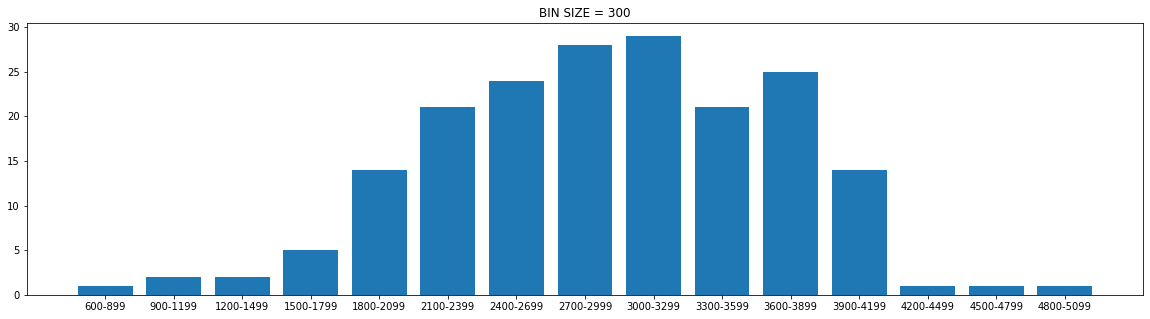

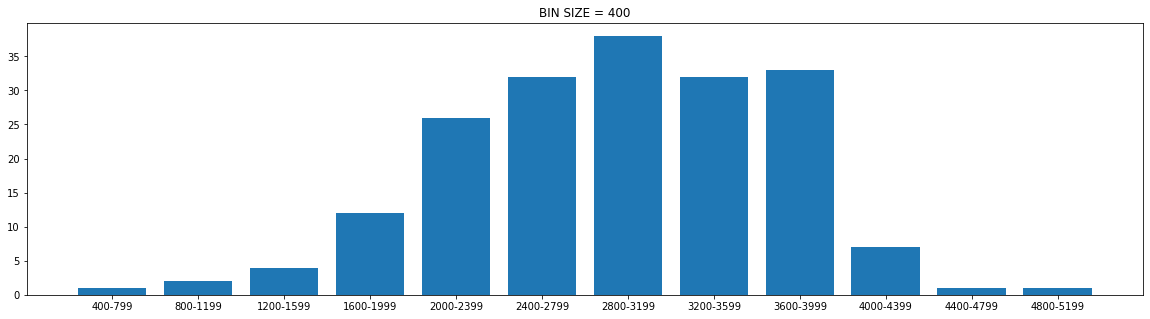

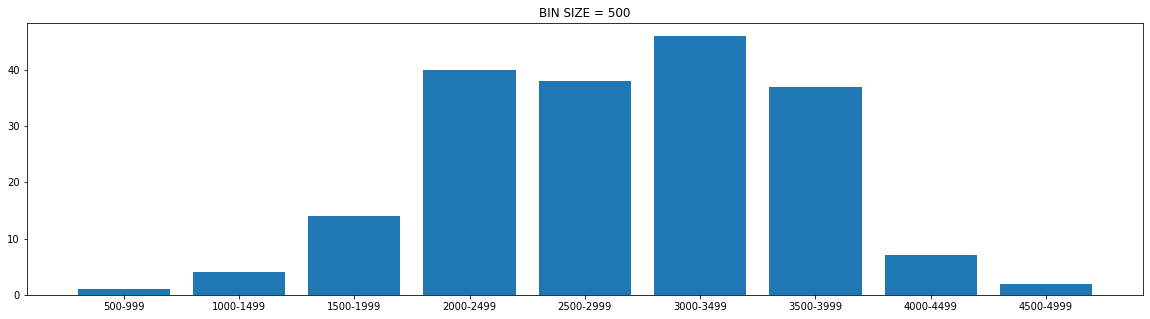

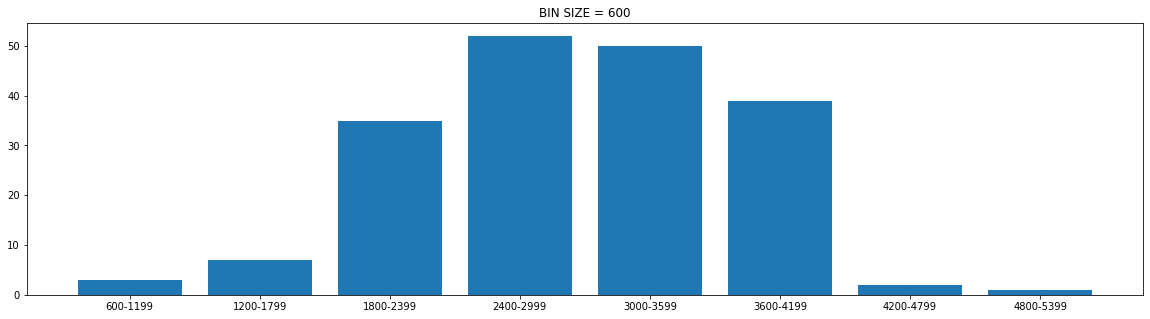

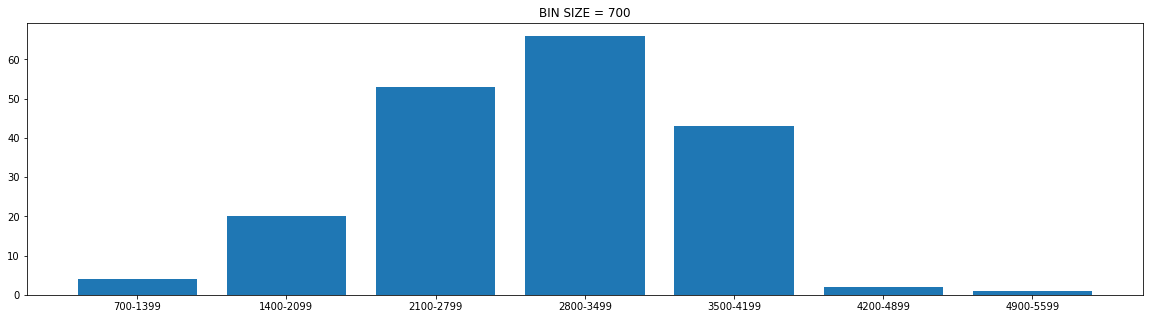

In [56]:
# OK, tiến tới 1 cách để làm giảm các cột này lại và khiến chúng "mập" lên để có thể nhìn cho rõ
# Bằng cách chia các cân nặng này vào các "BIN" (giỏ) với mỗi "BIN" có 1 kích thước như nhau (BIN_SIZE)
# Câu hỏi đặt ra là BIN_SIZE như thế nào là được, hay là cho đại
# Theo mình thì phải thử nhiều BIN_SIZE khác nhau tới khi nhìn thấy được đồ thị phân phối ra ngô ra khoai
# Tối thiểu là sau khi chia BIN , sẽ nên có từ 8 BIN trở lên
# Ví dụ, ta thấy min ~ 700 , max ~ 5000 => BIN thử ban đầu là (5000 - 700) / 8 ~ 500

def plot_bin_with_size(bin_size):
    def bin_convert(weight):
        bin = int(weight / bin_size)
        return f"{bin_size * bin}-{bin_size * bin + bin_size - 1}"
    
    bin_values = [bin_convert(w) for w in bw_data['BWT']]
    counter = Counter(bin_values)
    plt.figure(figsize=(20,5))
    plt.title(f"BIN SIZE = {bin_size}")
    plt.bar(*zip(*counter.items()))
    plt.show()

plot_bin_with_size(300)
plot_bin_with_size(400)
plot_bin_with_size(500)
plot_bin_with_size(600)
plot_bin_with_size(700)


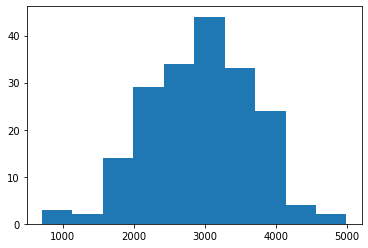

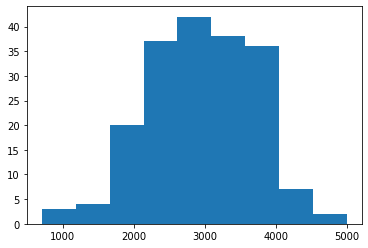

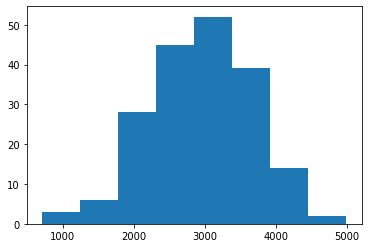

In [63]:
# OK, vẽ thủ công như vậy để hiểu rõ bản chất hơn của Histogram
# pandas và matplotlib có function để vẽ nhanh hơn như sau
# tham số `bins` ở đây không phải là bin_size mà là số bins chúng ta muốn

plt.hist(bw_data['BWT'],bins=10)
plt.show()

plt.hist(bw_data['BWT'],bins=9)
plt.show()

plt.hist(bw_data['BWT'],bins=8)
plt.show()
